In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [5]:
cormat = df.corr()

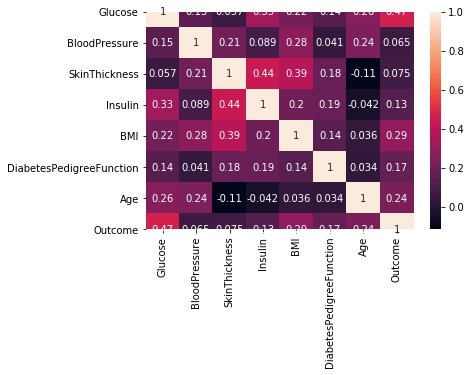

In [6]:
sns.heatmap(cormat,annot=True)

### Extract the feature (highly correlated columns)

In [8]:
feature = []
th = 0.2
for i in range(len(cormat.Outcome)):
    if(cormat.Outcome[i]>th):
        feature.append(cormat.index[i])
        
feature

['Glucose', 'BMI', 'Age', 'Outcome']

In [9]:
df1 = df[feature]
df1.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [11]:
cormat1=df1.corr()

In [12]:
cormat1

,Glucose,BMI,Age,Outcome
Glucose,1.000000,0.221071,0.263514,0.466581
BMI,0.221071,1.000000,0.036242,0.292695
Age,0.263514,0.036242,1.000000,0.238356
Outcome,0.466581,0.292695,0.238356,1.000000


### Extracting Feature Matrix

In [13]:
x = df.iloc[:,0:7]
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [14]:
y = df.iloc[:,7:]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


### do train test split 

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state = 66)

### import Logistic REgression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [18]:
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [19]:
result = pd.DataFrame({'Actual':y_test.values.flatten(),'Prediction':pred.flatten()})

In [85]:
result.head()

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### My Prediction

In [23]:
my_pred = model.predict([[150,64,0,0,23.3,0.672,32]])
print('prediction from model: ',my_pred)
if(my_pred[0]==0):
    print('Person is NOT Predicted as Diabetic')
else:
    print('Person is predicted as Diabetic')

prediction from model:  [1]
Person is predicted as Diabetic


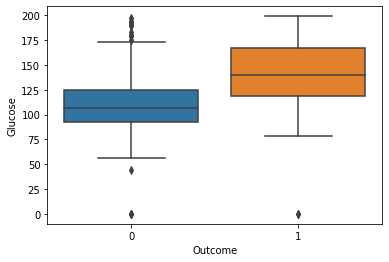

In [24]:
sns.boxplot(x='Outcome',y='Glucose',data=df)

### Model Evaluation 

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
confusion_matrix(y_test,pred)

array([[191,  20],
       [ 48,  49]], dtype=int64)

In [40]:
ac_org = accuracy_score(y_test,pred)

###  Modeling on highly correlated columns

In [28]:
df1.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [29]:
# x1, y1 feature matrix and response vector for df1 (high correlated columns)

x1 = df1.iloc[:,:3]
y1 = df1.iloc[:,3:]

In [32]:
x1.head()

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33


In [33]:
y1.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [35]:
# train and test spliting on x1, and y1

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.4,random_state = 66)

# create model 

model1 = LogisticRegression()
model.fit(x1_train,y1_train)
pred1 = model.predict(x1_test)

In [68]:
#result dataframe
result1 = pd.DataFrame({'Actual':y1_test.values.flatten(),'Prediction':pred1.flatten()})
result1.head()

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [45]:
# model evaluation

ac_corr= accuracy_score(y1_test,pred1)
print(confusion_matrix(y1_test,pred1))
print(ac_corr)

[[192  19]
 [ 54  43]]
0.762987012987013


In [52]:
# plot original data model with correlated data model
score = pd.DataFrame({'Dataset':['orignal','correlated'],'Score':[ac_org,ac_corr]})
score

,Dataset,Score
0,orignal,0.779221
1,correlated,0.762987


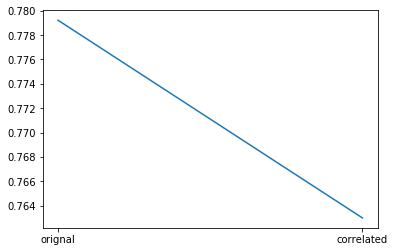

In [55]:
plt.plot('Dataset','Score',data=score)

### Modeling on Scaled Data

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
ss = StandardScaler()

In [59]:
# feature matrix and response vector
x2 = df.iloc[:,0:7]
y2 = df.iloc[:,7:]

In [61]:
x2 = ss.fit_transform(x2)

In [62]:
y2 = y2.values

In [65]:
# train and test spliting on x2, and y2

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.4,random_state = 66)

In [66]:
# create model 

model2 = LogisticRegression()
model.fit(x2_train,y2_train)
pred2 = model.predict(x2_test)

In [70]:
#result dataframe
result2 = pd.DataFrame({'Actual':y2_test.ravel(),'Prediction':pred2.ravel()})
result2.head()

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [72]:
# model evaluation

ac_scale= accuracy_score(y2_test,pred2)
print(confusion_matrix(y2_test,pred2))
print(ac_scale)

[[189  22]
 [ 47  50]]
0.775974025974026


In [82]:
score.loc[3] = ['scaled',ac_scale]

In [83]:
score

,Dataset,Score
0,orignal,0.779221
1,correlated,0.762987
3,scaled,0.775974


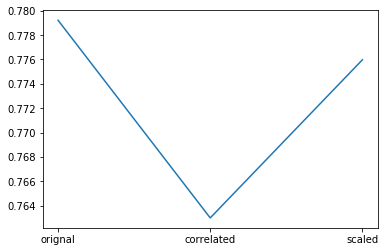

In [84]:
plt.plot('Dataset','Score',data=score)

### Using the original data gives the highest accuracy score